In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/ayushlodha/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# training_data features
data_features = pd.read_csv("train_logs.csv")
#training_data scores
data_scores = pd.read_csv("train_scores.csv")
data = pd.merge(data_features, data_scores, on='id', how='left')

In [4]:
data[['id','event_id','score']]

,id,event_id,score
0,001519c8,1,3.5
1,001519c8,2,3.5
2,001519c8,3,3.5
3,001519c8,4,3.5
4,001519c8,5,3.5
...,...,...,...
8405893,fff05981,3615,4.0
8405894,fff05981,3616,4.0
8405895,fff05981,3617,4.0
8405896,fff05981,3618,4.0


In [8]:
event_counts = data_features[['id','event_id']].groupby('id').size().reset_index(name='event_count')
# Merging the event_counts with the data_scores DataFrame on the 'id' column
merged_data = pd.merge(data_scores, event_counts, on='id', how='left')

# Plot of the Score Distribution - Number of Users of each Score

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_feature_distribution(df, column_name, feature_type):
    """
    Plots the distribution of a dataframe feature with aesthetic enhancements.

    :param df: pandas DataFrame containing the data
    :param column_name: the name of the column to plot
    :param feature_type: the type of the feature ('numerical' or 'categorical')
    """

    # Set up the matplotlib figure with a nicer style
    # sns.set(style="whitegrid", palette="deep", font_scale=1.2)
    f, axes = plt.subplots(1, 2, figsize=(15, 6), gridspec_kw={'width_ratios': [3, 1]})

    # Plot based on the specified feature type
    if feature_type == 'numerical':
        # Histogram with KDE for numerical features
        sns.histplot(df[column_name], kde=True, edgecolor='k', alpha=0.5, ax=axes[0])
        axes[0].set_title(f'Distribution of {column_name} (Numerical)')
        axes[0].set_xlabel(column_name)
        axes[0].set_ylabel('Frequency')

        # Add an average line
        mean_value = df[column_name].mean()
        axes[0].axvline(mean_value, color='r', linestyle='--', linewidth=2)
        axes[0].text(mean_value, axes[0].get_ylim()[1]*0.9, f'Mean: {mean_value:.2f}', color='r', ha='center')

        # Boxplot for numerical features
        sns.boxplot(x=df[column_name], ax=axes[1], saturation=0.5)
        axes[1].set_title(f'Boxplot of {column_name}')
        axes[1].set_xlabel(column_name)
        axes[1].set_yticks([])  # Remove y-axis labels for the boxplot

    elif feature_type == 'categorical':
        # Count plot for categorical features
        sns.countplot(y=column_name, data=df, order=df[column_name].value_counts().index, ax=axes[0])
        axes[0].set_title(f'Distribution of {column_name} (Categorical)')
        axes[0].set_xlabel('Count')
        axes[0].set_ylabel(column_name)

        # No boxplot for categorical features, so we can remove or hide the second axis
        f.delaxes(axes[1])  # or axes[1].set_visible(False)

    else:
        raise ValueError("feature_type must be 'numerical' or 'categorical'")

    # Further customize the plot for an overall polished look
    for ax in axes:
        # Apply despine for a cleaner look
        sns.despine(ax=ax, top=True, right=True, left=False, bottom=False)
        # Improve the legend or any texts
        for label in ax.get_xticklabels() + ax.get_yticklabels():
            label.set_fontsize(12)
            label.set_color("black")
            label.set_rotation(45)  # Rotate x labels for better fit

    # Adjust the layout and display the plot
    plt.tight_layout()
    plt.show()

# Use the function with an example
# plot_feature_distribution(your_dataframe, 'your_column', 'numerical')


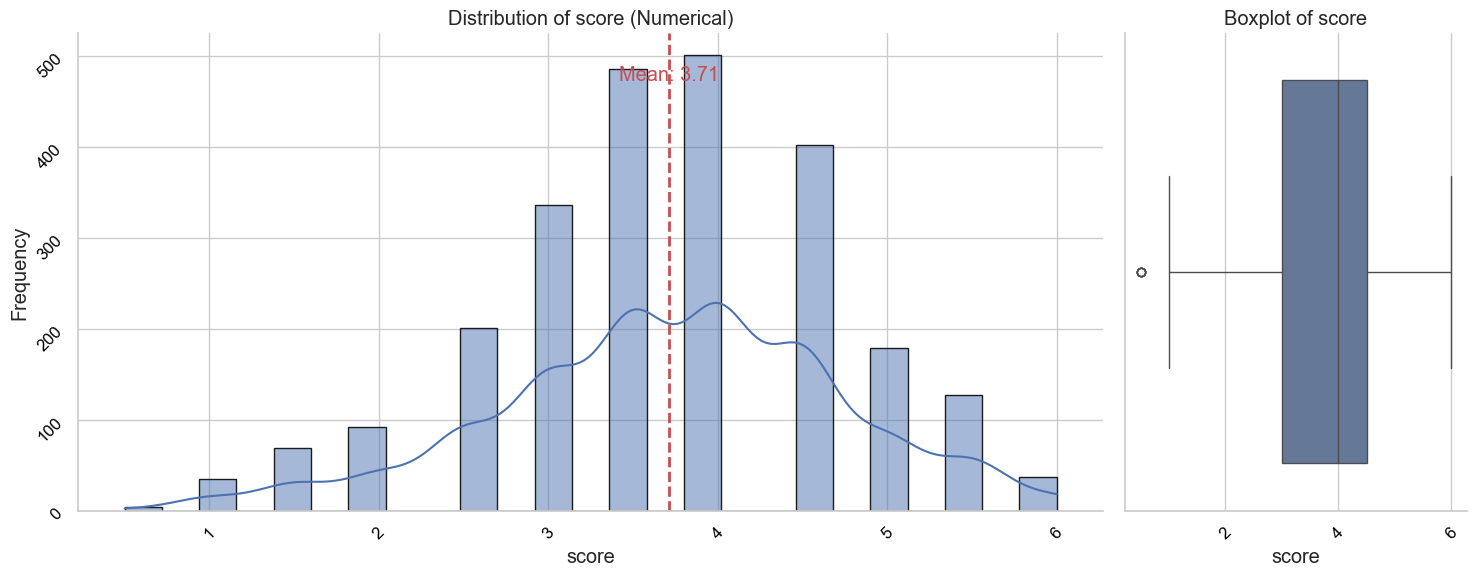

In [26]:
plot_feature_distribution(merged_data, 'score','numerical')

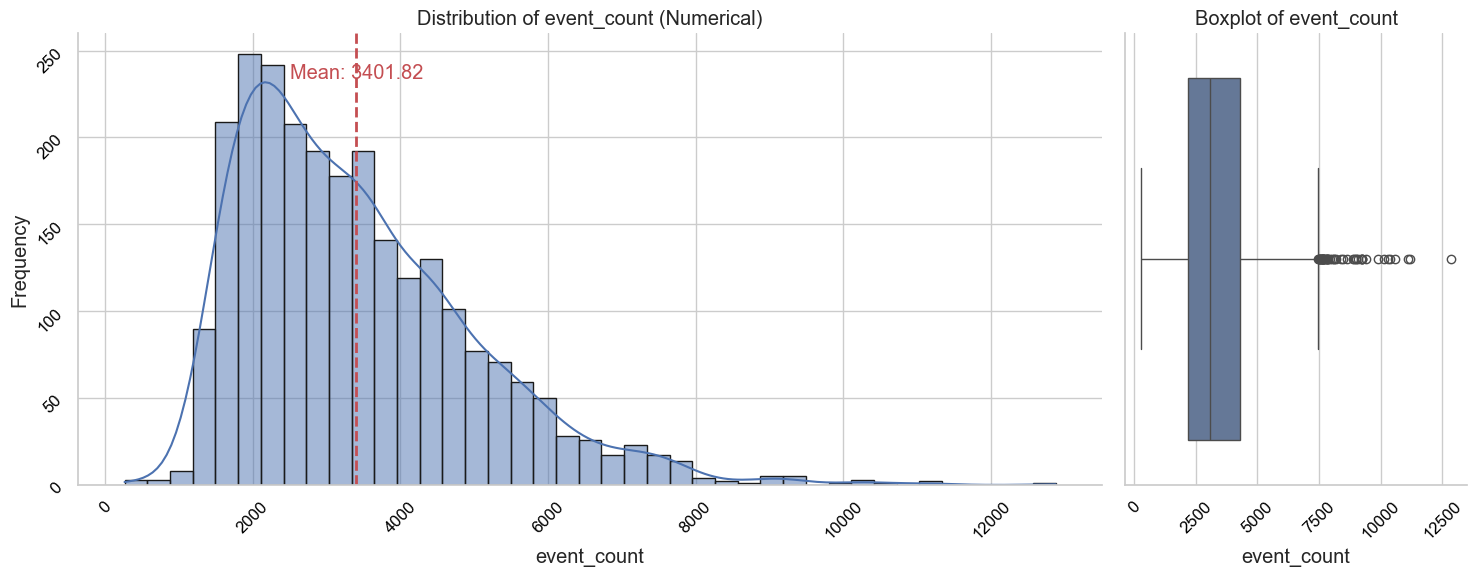

In [27]:
plot_feature_distribution(merged_data, 'event_count','numerical')

In [30]:
merged_data[['event_count','score']].corr()

,event_count,score
event_count,1.000000,0.590769
score,0.590769,1.000000


/Users/ayushlodha/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1550: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=color, **plot_kwargs)
/Users/ayushlodha/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1550: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

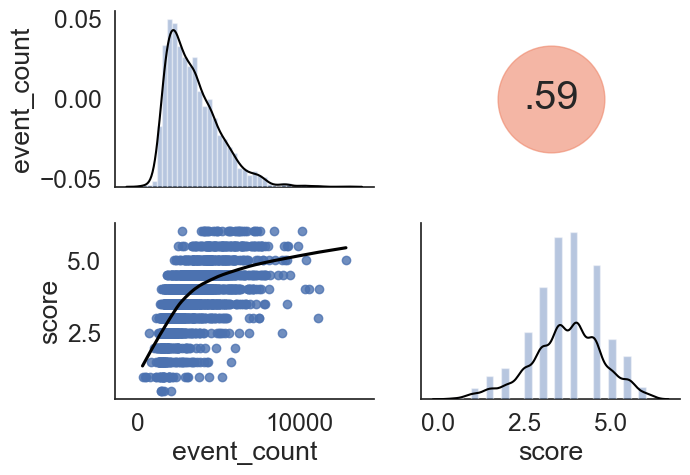

In [32]:
# Ensure this line is there to import necessary packages
import matplotlib.pyplot as plt
import seaborn as sns

# Here's your corrdot function as given
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

# Set the style for the seaborn plots
sns.set(style='white', font_scale=1.6)

# Instead of loading the Iris dataset, we'll use data_aggregated
# Let's assume data_aggregated is your aggregated DataFrame with sums of numeric features and the event_count

# Initialize the PairGrid
g = sns.PairGrid(merged_data[['event_count','score']], aspect=1.4, diag_sharey=False)

# Map the plots to the lower, upper, and diagonal
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
g.map_diag(sns.distplot, kde_kws={'color': 'black'})
g.map_upper(corrdot)

# You could also loop over axes to set labels and titles if needed
# for example, for ax in g.axes.flatten():
#     ax.set_xlabel(ax.get_xlabel(), rotation = 45)
#     ax.set_ylabel(ax.get_ylabel(), rotation = 45)
#     ax.set_title(ax.get_title(), fontsize='medium')

plt.show()

In [35]:
import pandas as pd

def aggregate_data(df, agg_methods):
    # Perform the aggregation using the provided methods
    data_aggregated = df.groupby('id').agg(agg_methods).reset_index()

    # Flatten the MultiIndex columns and add the aggregation methods to the column names
    if isinstance(data_aggregated.columns, pd.MultiIndex):
        # Use a conditional expression to leave 'score' as is
        data_aggregated.columns = [f"{col[0]}_{col[1]}" if col[0] != 'score' else col[0] for col in data_aggregated.columns.values]

    return data_aggregated

# Define the aggregation methods outside of the function
aggregation_methods = {
    'down_time': ['sum'],
    'up_time': ['sum'],
    'action_time': ['sum'],
    'cursor_position': ['max'],
    'word_count': ['max'],
    'score': ['mean'],  # This will be left as 'score' in the column name
}

# Assume 'data' is a DataFrame already loaded
# Call the function with the data and the aggregation methods
data_aggregated = aggregate_data(data, aggregation_methods)
print(data_aggregated)

           id_  down_time_sum  up_time_sum  action_time_sum  \
0     001519c8     2168798234   2169095477           297243   
1     0022f953     1273271023   1273546414           275391   
2     0042269b     3426641982   3427063183           421201   
3     0059420b     1222211589   1222401185           189596   
4     0075873a     1805499474   1805813176           313702   
...        ...            ...          ...              ...   
2466  ffb8c745     3488386746   3488886416           499670   
2467  ffbef7e5     2192480040   2192694261           214221   
2468  ffccd6fd     3764472937   3764704517           231580   
2469  ffec5b38     1869073112   1869362551           289439   
2470  fff05981     3897099261   3897400496           301235   

      cursor_position_max  word_count_max  score  
0                    1539             256    3.5  
1                    1676             323    3.5  
2                    2291             404    6.0  
3                    1047             2

/Users/ayushlodha/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1550: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=color, **plot_kwargs)
/Users/ayushlodha/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1550: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

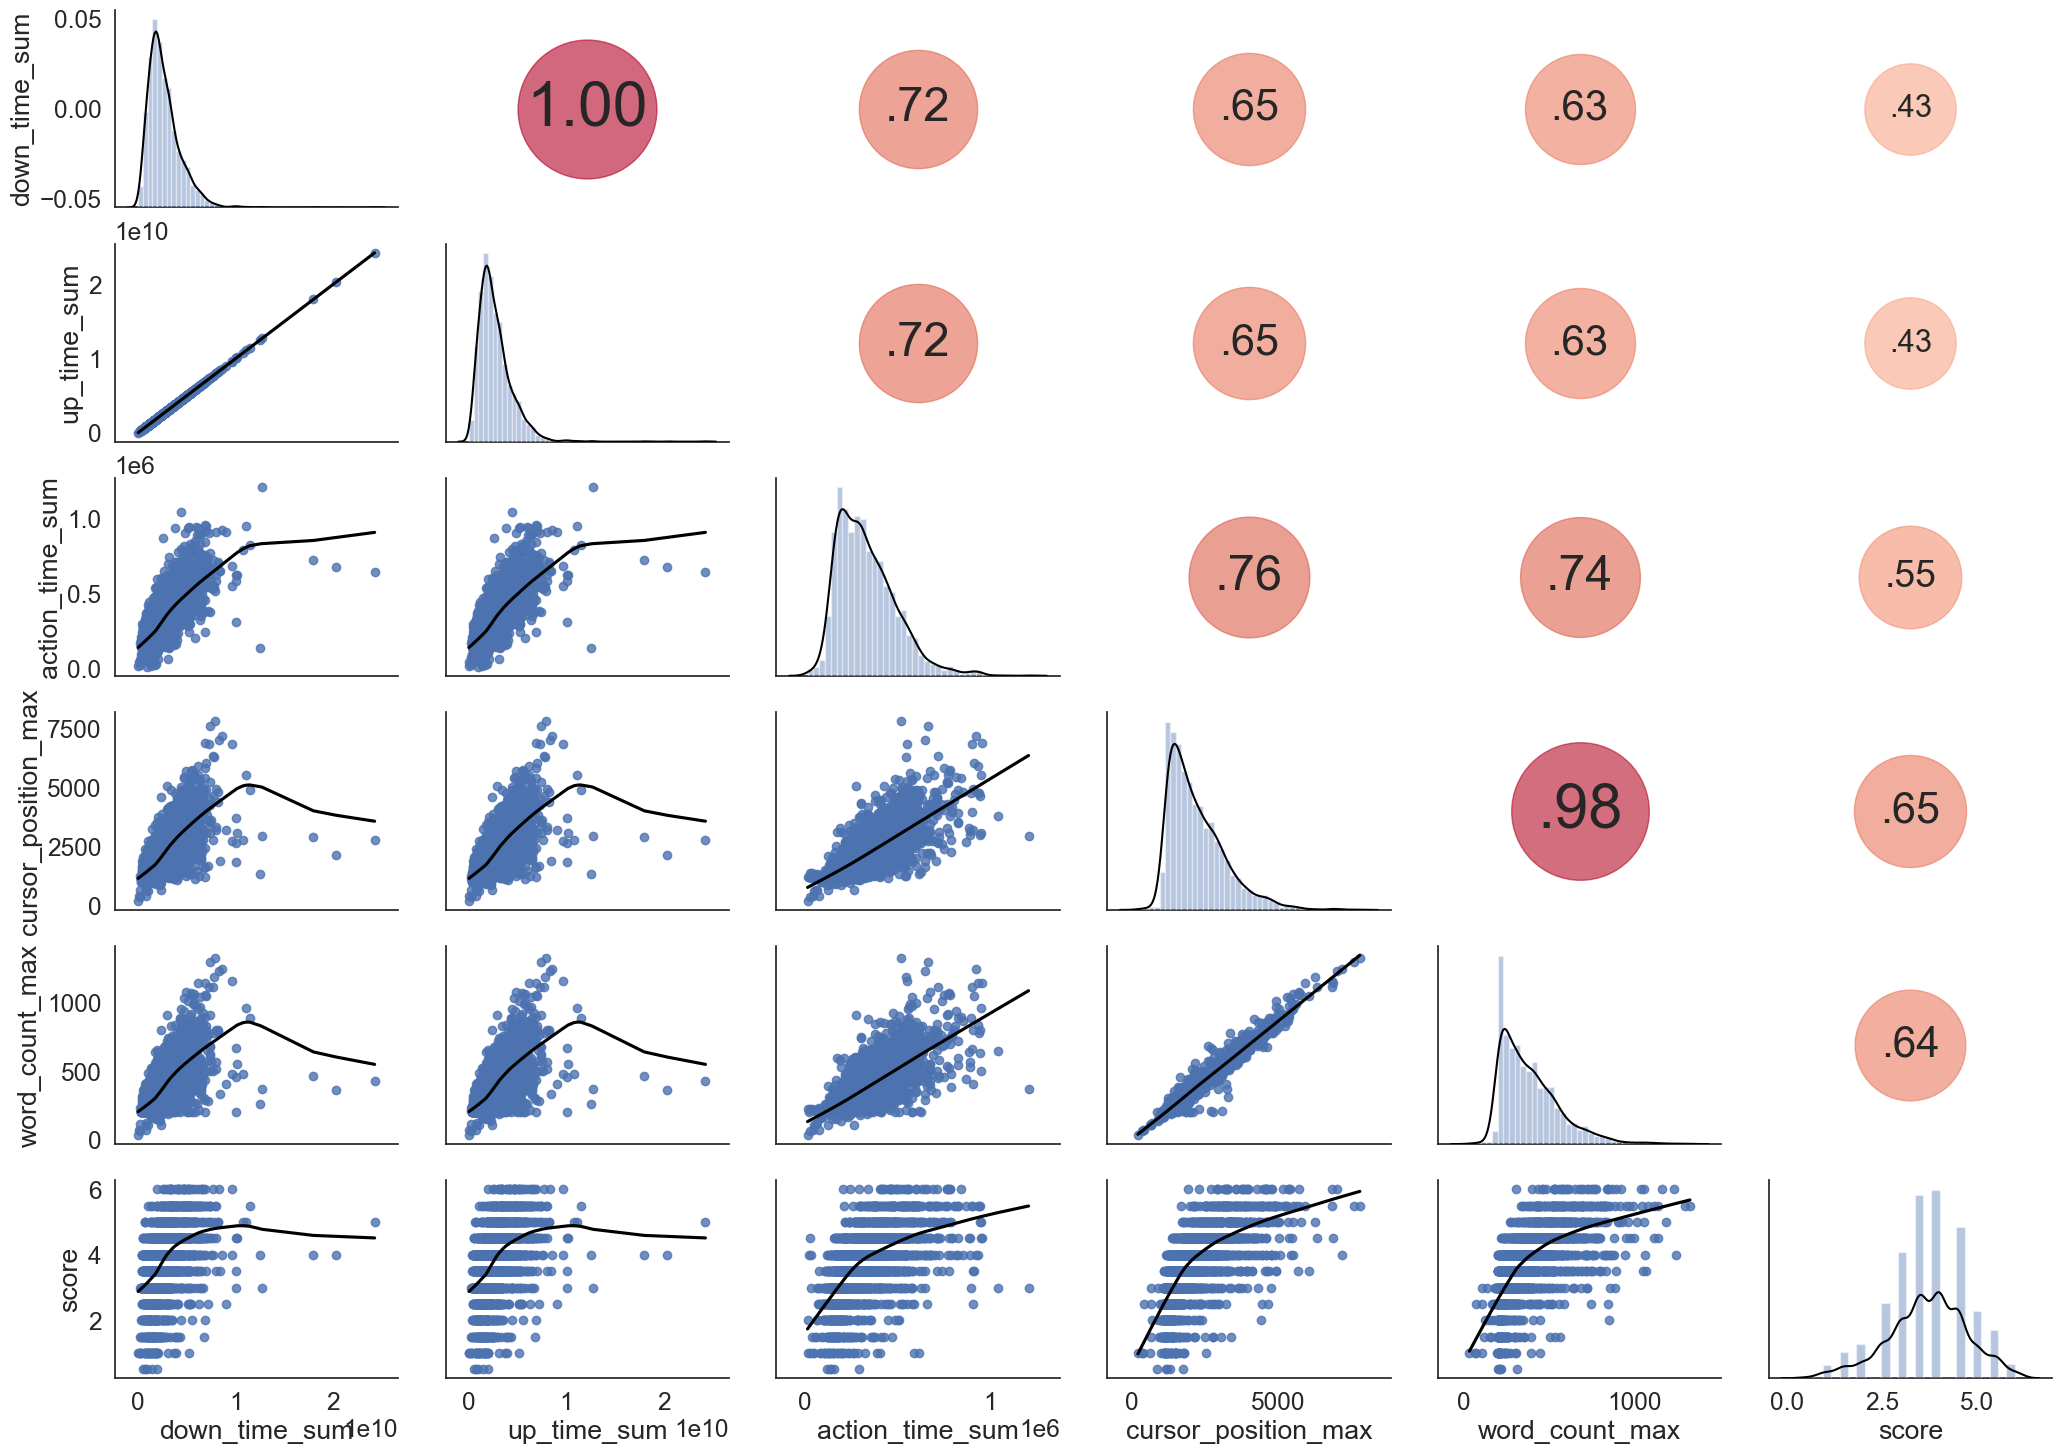

In [36]:
# Ensure this line is there to import necessary packages
import matplotlib.pyplot as plt
import seaborn as sns

# Here's your corrdot function as given
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

# Set the style for the seaborn plots
sns.set(style='white', font_scale=1.6)

# Instead of loading the Iris dataset, we'll use data_aggregated
# Let's assume data_aggregated is your aggregated DataFrame with sums of numeric features and the event_count

# Initialize the PairGrid
g = sns.PairGrid(data_aggregated, aspect=1.4, diag_sharey=False)

# Map the plots to the lower, upper, and diagonal
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
g.map_diag(sns.distplot, kde_kws={'color': 'black'})
g.map_upper(corrdot)

# You could also loop over axes to set labels and titles if needed
# for example, for ax in g.axes.flatten():
#     ax.set_xlabel(ax.get_xlabel(), rotation = 45)
#     ax.set_ylabel(ax.get_ylabel(), rotation = 45)
#     ax.set_title(ax.get_title(), fontsize='medium')

plt.show()

In [39]:
data[['id', 'activity','score']]

,id,activity,score
0,001519c8,Nonproduction,3.5
1,001519c8,Nonproduction,3.5
2,001519c8,Nonproduction,3.5
3,001519c8,Input,3.5
4,001519c8,Input,3.5
...,...,...,...
8405893,fff05981,Nonproduction,4.0
8405894,fff05981,Nonproduction,4.0
8405895,fff05981,Replace,4.0
8405896,fff05981,Nonproduction,4.0
